Importing necessary modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier


Import MNIST Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True)

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist_data = pd.concat([mnist['target'], mnist['data']], axis=1)
mnist_data.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train, test = train_test_split(mnist_data, test_size=0.15 , random_state=21)

In [7]:
ytrain = train['class']
ytest  = test['class']
train  = train.drop('class', axis = 1)
test   = test.drop('class', axis = 1)

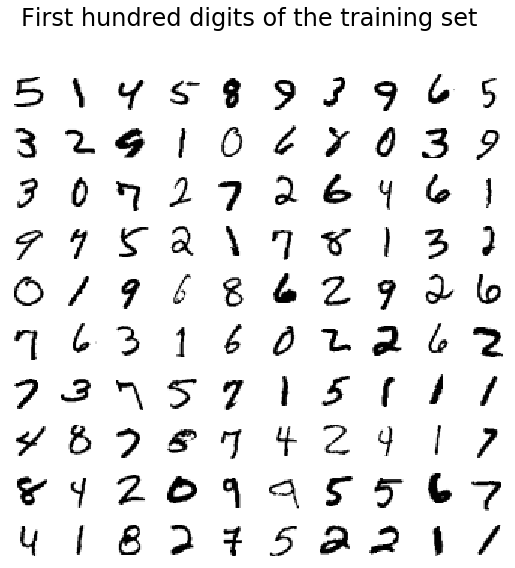

In [8]:
def plot_digit(image_data):
    image = np.array(image_data).reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

fig = plt.figure(figsize = (9,9))
for idx in range(100):
    plt.subplot(10,10, idx+1)
    some_digit = train.iloc[idx]
    plot_digit(some_digit)

fig.suptitle("First hundred digits of the training set", fontsize=24)
plt.show()

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.astype(np.float64))

In [10]:
model_sgd = SGDClassifier()
model_sgd.fit(X_train_scaled,ytrain)


SGDClassifier()

In [11]:
test_scaled = scaler.fit_transform(test.astype(np.float64))

In [12]:
y_pred = model_sgd.predict(test_scaled)

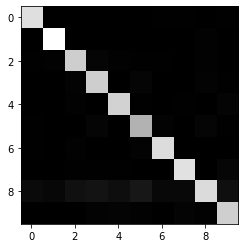

In [13]:
cnf_mx = confusion_matrix(y_pred, ytest)
plt.imshow(cnf_mx, cmap = "gray")


In [14]:
accuracy = np.sum(y_pred==ytest)/y_pred.size
print(accuracy)


0.8978095238095238
